In [1]:
import numpy as np

In [2]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 200

In [3]:
import sys

In [4]:
sys.path.append('/u/wangnisn/devel/Machine_learning_dynamics/bayesian')

In [5]:
import scipy
from scipy.io import loadmat
from data_generator import DataGenerator

In [6]:
from likelihood import GaussianLogLikelihood
from prior import ComplexityLogPrior
from posterior import LogPosterior
from mcmc import MCMC
from sequential_mc import SequentialMC
from util import generate_binary_coef_random
import pandas as pd

In [7]:
import matplotlib.pyplot as plt

In [8]:
from nn_smoothing_1D import NNSmoothing1D

In init py ['/talos/u/wangnisn/devel/Machine_learning_dynamics/examples/phase_field_simulation_clean', '', '/mpcdf/soft/SLE_15/packages/x86_64/keras/anaconda_3_2019.03-2019.03/2.3.1/lib/python3.7/site-packages', '/mpcdf/soft/SLE_15/packages/skylake/tensorflow/gpu/anaconda_3_2019.03-2019.03-cuda_10.0-10.0.130/1.14.0/lib/python3.7/site-packages', '/mpcdf/soft/SLE_15/packages/skylake/pytorch/gpu/anaconda_3_2019.03-2019.03-cuda_10.0-10.0.130/1.2.0/lib/python3.7/site-packages', '/u/wangnisn/kaggle/defect_in_steel/version3/code/dummy_11a', '/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2019.03/lib/python37.zip', '/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2019.03/lib/python3.7', '/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2019.03/lib/python3.7/lib-dynload', '/u/wangnisn/.local/lib/python3.7/site-packages', '/u/wangnisn/.local/lib/python3.7/site-packages/pystem-0.0.13-py3.7-linux-x86_64.egg', '/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2019.03/lib/python3.7/site-packages', '/mpcdf/so

W0601 13:06:32.923330 47064276315520 __init__.py:308] Limited tf.compat.v2.summary API due to missing TensorBoard installation.
W0601 13:06:32.961839 47064276315520 deprecation_wrapper.py:119] From /u/wangnisn/devel/Machine_learning_dynamics/bayesian/nn_smoothing_1D.py:14: The name tf.set_random_seed is deprecated. Please use tf.compat.v1.set_random_seed instead.



In [9]:
data = loadmat('/u/wangnisn/devel/Machine_learning_dynamics/data/phase_field_oneD_simulation_beginning_stage.mat')

In [10]:
data['usol'].shape

(500, 500)

In [11]:
a = np.array([[1,2]])

Text(0, 0.5, 'x')

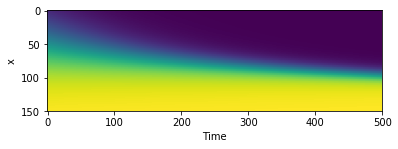

In [12]:
plt.imshow(data['usol'][50:200,:])
plt.xlabel('Time')
plt.ylabel('x')

In [13]:
data['usol'].shape

(500, 500)

In [14]:
# calculate derivatives and prepare data
u = data['usol'][50:200,:]
x = np.squeeze(data['x'])[50:200]
t = np.squeeze(data['t'])[:]

In [15]:
u.shape

(150, 500)

In [16]:
x_mesh, t_mesh = np.meshgrid(x,t,indexing='ij')

In [17]:
x_train =  x_mesh.flatten()

In [18]:
t_train = t_mesh.flatten()

In [19]:
y_train = u.flatten()

In [49]:
hidden_layers = [ 20, 20, 20, 20, 20, 20]
#hidden_layers = [ 20, 20, 20, 20, 20, 20, 20, 20, 20, 20]

In [50]:
nnsmooth = NNSmoothing1D(x=x_train, t=t_train,u=y_train, hidden_layers=hidden_layers,alpha=0.1)

In [51]:
nnsmooth.train(5000)

It: 0, Loss: 2.671e+04, Time: 2.12
It: 10, Loss: 5.937e+03, Time: 0.49
It: 20, Loss: 2.339e+03, Time: 0.48
It: 30, Loss: 1.609e+03, Time: 0.47
It: 40, Loss: 1.547e+03, Time: 0.47
It: 50, Loss: 1.336e+03, Time: 0.49
It: 60, Loss: 1.335e+03, Time: 0.48
It: 70, Loss: 1.284e+03, Time: 0.48
It: 80, Loss: 1.262e+03, Time: 0.47
It: 90, Loss: 1.235e+03, Time: 0.48
It: 100, Loss: 1.202e+03, Time: 0.49
It: 110, Loss: 1.165e+03, Time: 0.49
It: 120, Loss: 1.118e+03, Time: 0.48
It: 130, Loss: 1.056e+03, Time: 0.49
It: 140, Loss: 9.763e+02, Time: 0.50
It: 150, Loss: 8.719e+02, Time: 0.48
It: 160, Loss: 7.420e+02, Time: 0.49
It: 170, Loss: 5.950e+02, Time: 0.49
It: 180, Loss: 4.494e+02, Time: 0.48
It: 190, Loss: 3.349e+02, Time: 0.46
It: 200, Loss: 2.766e+02, Time: 0.50
It: 210, Loss: 2.597e+02, Time: 0.47
It: 220, Loss: 2.547e+02, Time: 0.48
It: 230, Loss: 2.489e+02, Time: 0.49
It: 240, Loss: 2.424e+02, Time: 0.47
It: 250, Loss: 2.365e+02, Time: 0.47
It: 260, Loss: 2.307e+02, Time: 0.46
It: 270, Los

KeyboardInterrupt: 

In [52]:
u_predict, u_t_predict, u_x_predict, u_xx_predict = nnsmooth.predict(np.expand_dims(x_train,1), np.expand_dims(t_train,1))

In [53]:
u_predict = np.reshape(u_predict, u.shape)
u_t_predict = np.reshape(u_t_predict, u.shape)
u_x_predict = np.reshape(u_x_predict, u.shape)
u_xx_predict = np.reshape(u_xx_predict, u.shape)

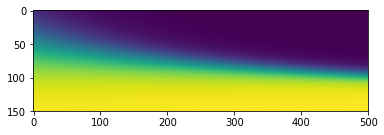

In [54]:
plt.imshow(u)

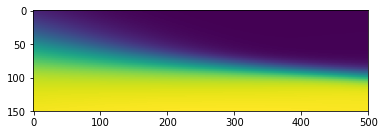

In [55]:
plt.imshow(u_predict)

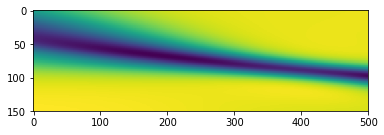

In [56]:
plt.imshow(u_t_predict)

In [57]:
ind = 40

In [58]:
np.save('train_data_simulation_clean',np.vstack([u_predict.flatten(),u_x_predict.flatten(),u_xx_predict.flatten(), u_t_predict.flatten()]).T)